In [1]:
import pandas as pd
P=pd.ExcelFile("pluvio_senegal.xlsx")
print("Les noms des feuilles sont :",P.sheet_names)

Les noms des feuilles sont : ['Pluvio_fatick', 'Pluvio_Toubacouta', 'Pluvio_Foundioune']


In [ ]:
Fat=P.parse('Pluvio_Toubacouta')
Fat

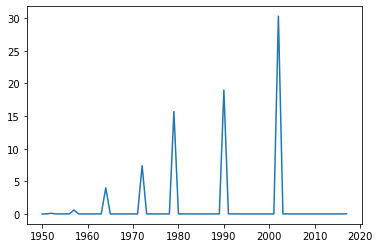

In [7]:
import numpy as np
import matplotlib.pyplot as plt
pluv_janv=Fat['Janv'].values
an=Fat['Annees'].values
plt.plot(an,pluv_janv)
plt.show()

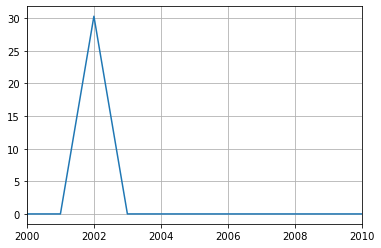

In [8]:
plt.plot(an,pluv_janv)
plt.xlim(2000,2010)
plt.grid()
plt.show()

In [9]:
an_max=an[np.argmax(pluv_janv)]
print("La courbe est maximale en ",an_max)

La courbe est maximale en  2002


In [14]:
don=Fat.to_numpy()
don_extr=don[:,2:14]
#Calculer la moyenne de pluviometrie mensuelle chaque annee de l'intervalle
m1=np.nanmean(don_extr[0:20],axis=0)
m2=np.nanmean(don_extr[20:50],axis=0)
m3=np.nanmean(don_extr[50:68],axis=0)
inter=['Janv','Fevr','Mars','Avr','Mai','Juin','Juil','Aout','Sept','Oct','Nov','Dec']

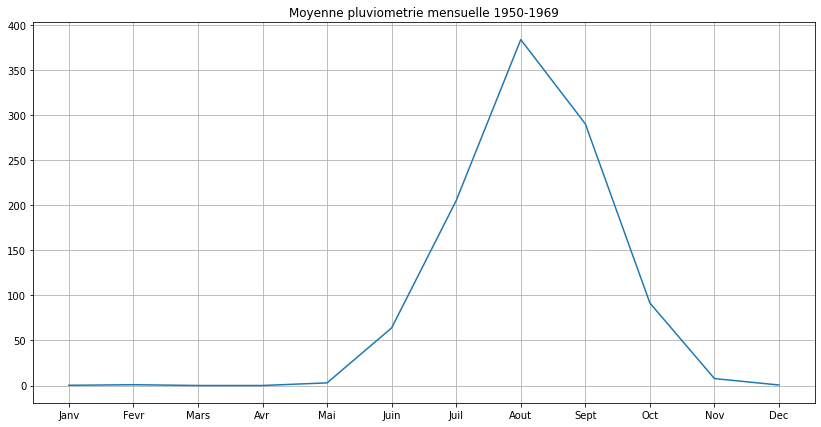

In [15]:
moy=m1
fig1,ax1=plt.subplots(figsize=(14,7))
ax1.plot(inter,moy)
plt.title("Moyenne pluviometrie mensuelle 1950-1969")
plt.grid()
plt.show()

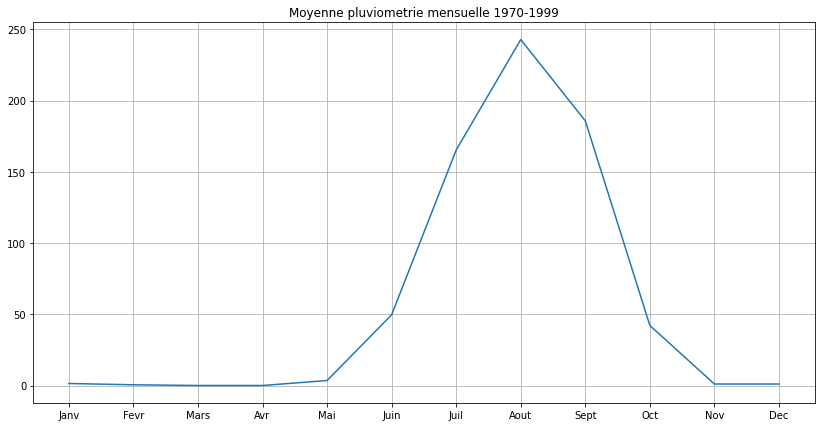

In [16]:
moy2=m2
fig2,ax2=plt.subplots(figsize=(14,7))
ax2.plot(inter,moy2)
plt.title("Moyenne pluviometrie mensuelle 1970-1999")
plt.grid()
plt.show()

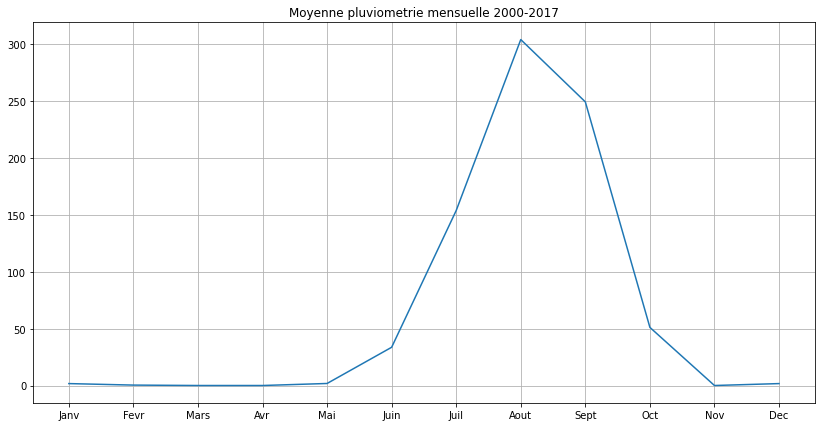

In [17]:
moy3=m3
fig3,ax3=plt.subplots(figsize=(14,7))
ax3.plot(inter,moy3)
plt.title("Moyenne pluviometrie mensuelle 2000-2017")
plt.grid()
plt.show()

In [18]:
pluv_an=[np.nansum(don_extr,axis=1)]
moy_glob=np.mean(pluv_an)
dif=(pluv_an-moy_glob),dtype=float

In [ ]:
an=np.array(don[:,1],dtype=int)
fig,ax=plt.subplots(figsize=(14,7))
ax.bar(an,dif[0,:],0.5)
plt.show()

In [24]:
dif[0]

array([ 476.86764706,  383.06764706,  334.16764706,  256.36764706,
       -266.83235294,  357.66764706,  100.26764706,  371.66764706,
        739.76764706,  194.46764706,  136.86764706,  -92.03235294,
         46.56764706,   44.66764706,  351.56764706,  297.56764706,
        238.06764706,  410.36764706, -204.53235294,  153.46764706,
        -90.83235294,  106.46764706, -376.43235294, -111.03235294,
        -44.63235294,  192.06764706, -101.83235294, -337.63235294,
        104.16764706,  -24.53235294, -339.63235294, -111.43235294,
       -449.83235294, -289.33235294, -360.63235294, -162.83235294,
       -105.83235294, -115.93235294,  115.26764706,  155.86764706,
       -286.93235294, -318.63235294, -221.83235294, -181.93235294,
         32.86764706, -383.03235294, -215.03235294, -115.03235294,
       -149.23235294,  191.96764706,   49.96764706, -124.83235294,
       -134.03235294, -227.83235294, -352.23235294,   52.46764706,
        -51.23235294, -339.13235294,  154.36764706,  277.06764

# 1950-1969

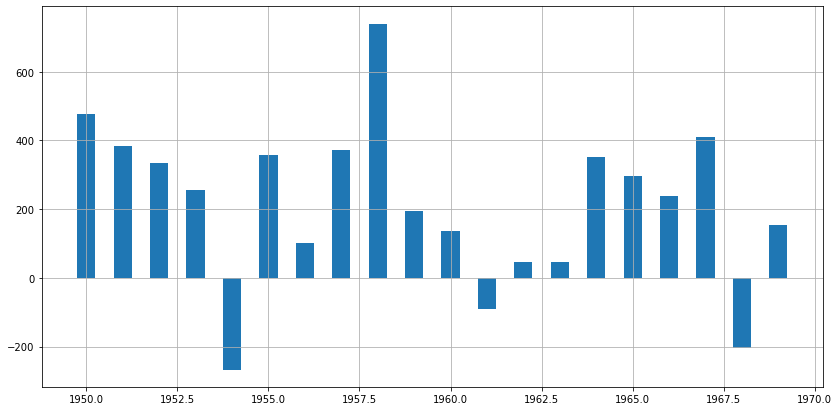

In [25]:
som1=[np.nansum(don_extr[0:20],axis=1)]
an1=an[0:20]
dif1=som1-moy_glob
fig4,ax4=plt.subplots(figsize=(14,7))
ax4.bar(an1,dif1[0,:],0.5)
plt.grid()
plt.show()

# 1970-1999

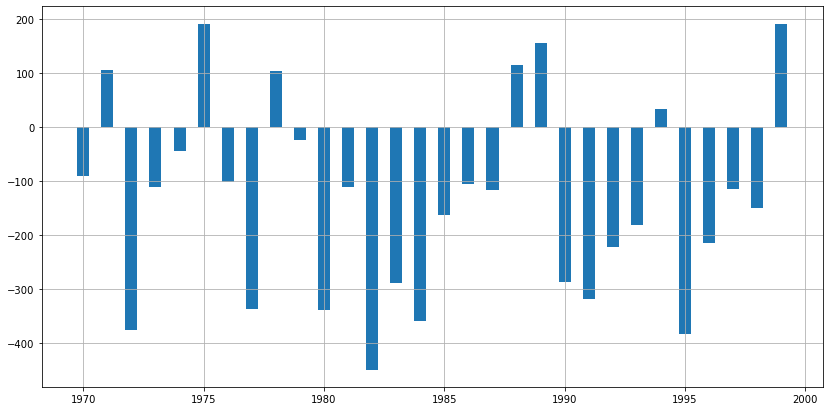

In [26]:
som2=[np.nansum(don_extr[20:50],axis=1)]
an2=an[20:50]
dif2=som2-moy_glob
fig5,ax5=plt.subplots(figsize=(14,7))
ax5.bar(an2,dif2[0,:],0.5)
plt.grid()
plt.show()

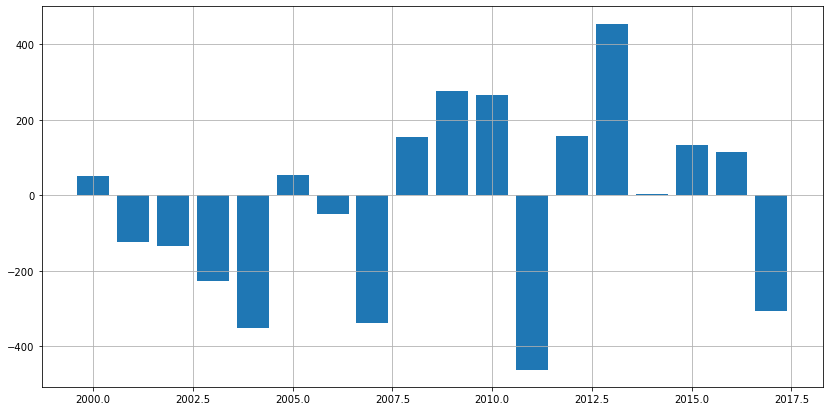

In [27]:
som3=[np.nansum(don_extr[50:68],axis=1)]
an3=an[50:68]
dif3=som3-moy_glob
fig6,ax6=plt.subplots(figsize=(14,7))
ax6.bar(an3,dif3[0,:],)
plt.grid()
plt.show()

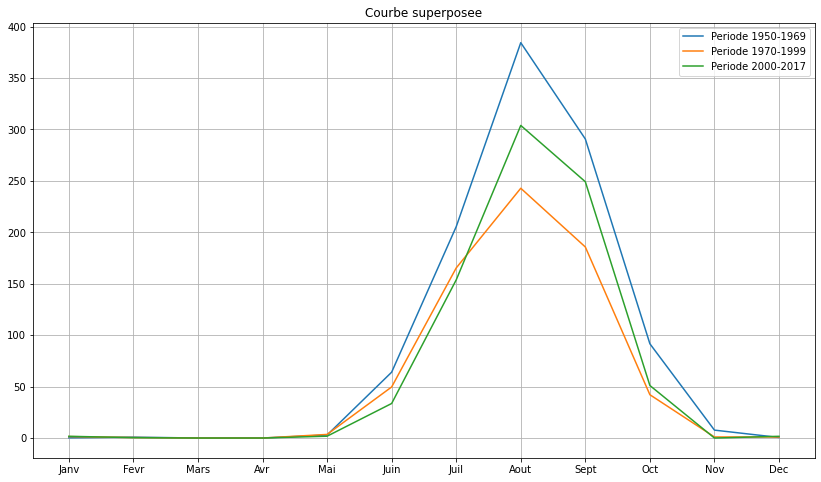

In [28]:
f4,a4=plt.subplots(figsize=(14,8))
plt.plot(inter,moy,label="Periode 1950-1969")
plt.plot(inter,moy2,label="Periode 1970-1999")
plt.plot(inter,moy3,label="Periode 2000-2017")
plt.grid()
plt.legend()
plt.title("Courbe superposee")
plt.show()

In [29]:
import xlwings as pluie
pluie_Toubacouta=pluie.Book("pluvio_senegal.xlsx")
pluie_Toubacouta.sheets.add("Pluvio_mensuelle_Toubacouta")
Toub=pluie_Toubacouta.sheets["Pluvio_mensuelle_Toubacouta"]
a4=a4.get_figure()
Toub.pictures.add(a4,name="Pluviometrie mensuelle Toubacouta",update=True)
plt.show()